# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Mounting Google Drive to the colab to access files stored in it
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Defining the path where the data is located
path='/content/drive/MyDrive/Colab Notebooks/PostGraduateProgram(UniversityofTexas)-AI ML/Assessments/FoodHub/foodhub_order.csv'
# Loading the dataset into dataframe
df = pd.read_csv(path)

In [ ]:
# View the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


- *The dataset reveals the information of the orders made by the customers using the app.*
- *It shows the demand of different restaurants of the customers.*

In [ ]:
# Checking how many rows and columns are present in the data with the method called shape
df.shape

(1898, 9)

#### Observations: It is revealed that 1898 rows and 9 columns are present in the data.


In [ ]:
# Finding the datatypes of the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 4 integer columns, 1 float column, and 4 object columns.


In [ ]:
# Finding the missing values
df.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in the data


In [ ]:
# Checking the statistical summary using describe() from the food_preparation_time column
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
- *On total of 1898 orders, the average amount of time to prepare food (average time) is 27.37 minutes.*
- *The fastest amount of time to prepare food (minimum time) is 20 minutes and the slowest amount of time (maximum time) is 35 minutes.*
- *Mostly the food is prepared in the range of 23-31 minutes.*


In [ ]:
# Checking the no of not rated columns by counting the no of 'Not given' labels in the rating column
# .shape[0] returns only the no of rows in the dataframe
df[df['rating']=='Not given'].shape[0]

736

#### Observations: There are 736 non-rated orders


### Exploratory Data Analysis (EDA)

### Univariate Analysis

Observations on the `cost_of_the_order` distribution.

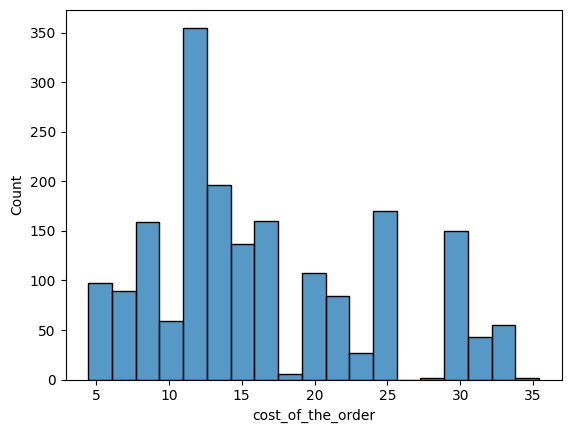

In [ ]:
# Plots a histogram to visualize the distribution of order costs, helping identify common price ranges and skewness in spending behavior
sns.histplot(data=df,x='cost_of_the_order');


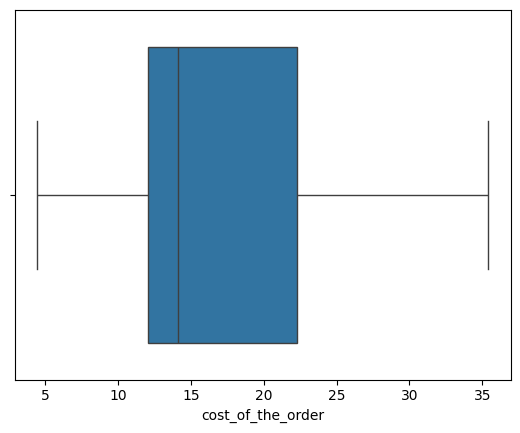

In [ ]:
# Creates a boxplot to visualize the distribution and spread of order costs
sns.boxplot(data=df,x='cost_of_the_order');



- *The `cost_of_the_order` column is right-skewed.*
- *There are no outliers found in the boxplot.*
- *Half of all orders are between 12 and 22 dollars.*
- *There is a peak frequency between 12 and 13 dollars, indicating that low-cost orders are ordered more.*

Observation on the `food_preparation_time` distribution.

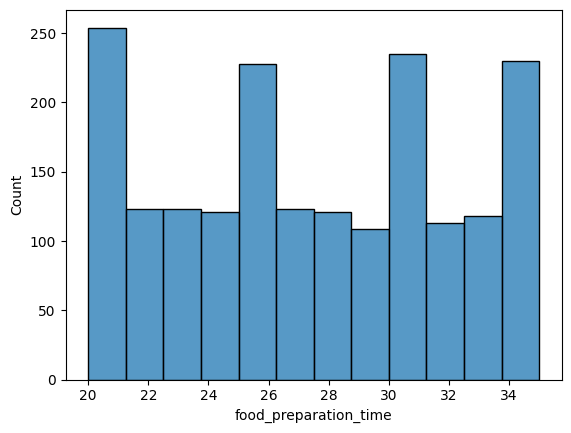

In [ ]:
# Plots a histogram to visualize the distribution of food preparation times, helping identify typical prep durations and any skewness in restaurant efficiency
sns.histplot(data=df,x='food_preparation_time');

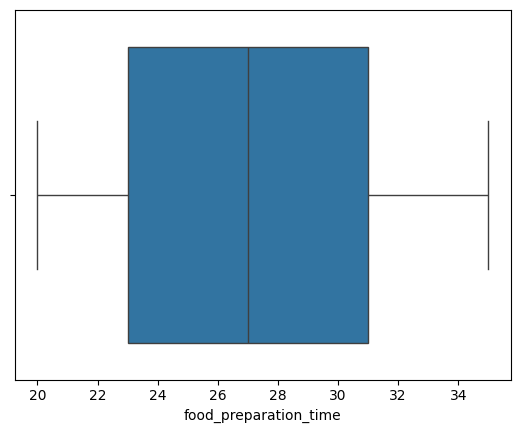

In [ ]:
# Creates a boxplot to visualize the distribution of food preparation times, highlighting the median, quartiles, and any outliers in restaurant efficiency
sns.boxplot(data=df,x='food_preparation_time');

- *The `food_preparation_time` column is symmetric.*
- *There are no outliers found in the boxplot.*
- *50% of the preparation time is between 23 and 31 minutes.*

Observation on the `delivery_time` distribution.

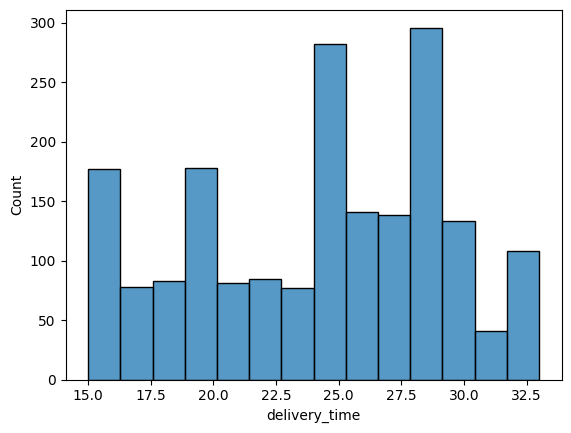

In [ ]:
# Plots a histogram to visualize the distribution of delivery times, helping identify typical delivery durations and any skewness in service speed
sns.histplot(data=df,x='delivery_time');

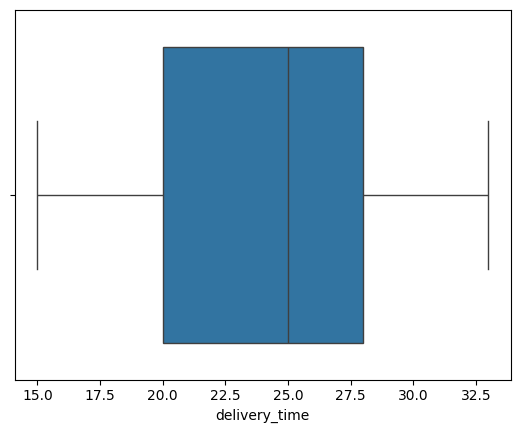

In [ ]:
# Creates a boxplot to visualize the distribution of delivery times, highlighting the median, quartiles, and any outliers in delivery performance
sns.boxplot(data=df,x='delivery_time');

- *The `delivery_time` column is left-skewed.*
- *50% of the deliveries take places between 20 and 28 minutes.*
- *There are no outliers found in the boxplot.*

Observation on the `day_of_the_week` distribution.

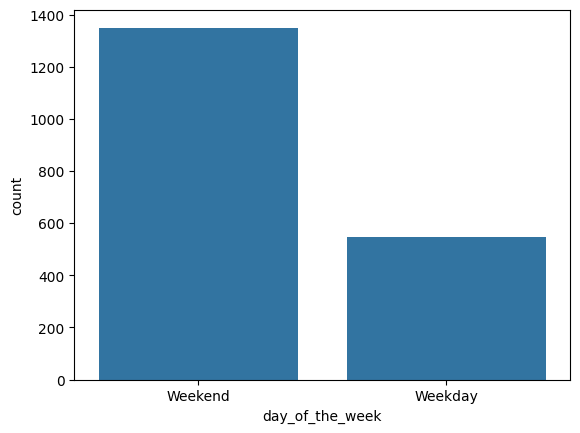

In [ ]:
# Creates a countplot to visualize the number of orders placed on each day type (weekday vs. weekend), revealing customer demand patterns across the week
sns.countplot(data=df,x='day_of_the_week');

- *The number of orders is higher on weekends than weekdays.*
- *The data is not evenly distributed across the week.*
- *It shows that weekends are peak periods.*

Observation on the `cuisine_type` distribution.

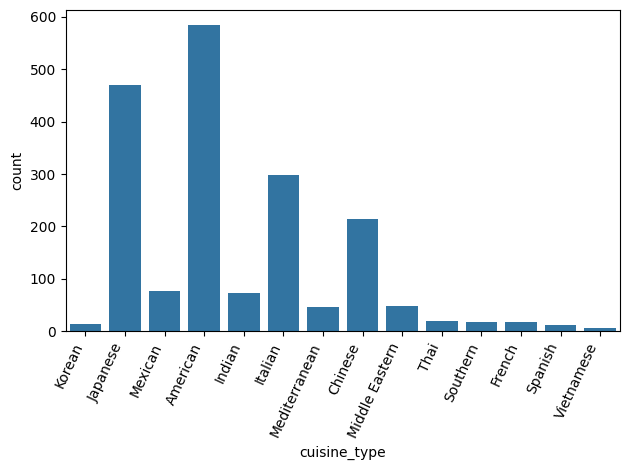

In [ ]:
# Creates a countplot to visualize the frequency of each cuisine type ordered
# Rotates x-axis labels for better readability, adjusts layout to prevent overlap, and displays the plot
sns.countplot(data=df,x='cuisine_type');
plt.xticks(rotation=65,ha='right',fontsize=10);
plt.tight_layout();
plt.show();

- *American cuisine is ordered more, showing that most of the customers love American cuisine.*
- *Japanese cuisine is loved by the customers, followed by American cuisine.*
- *Vietnamese cuisine is the least ordered of all cuisines.*

Observation on the `rating` distribution.

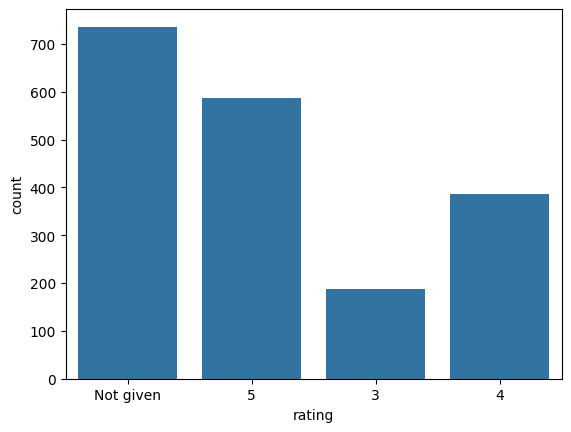

In [ ]:
# Creates a countplot to visualize the distribution of customer ratings, highlighting how frequently each rating level was given
sns.countplot(data=df,x='rating');

- *`Rating 5` is the most common among the other two ratings.*
- *Most of the orders were not rated, indicating a large portion of customers skipped feedback.*
- `Rating 3` has a lower count than all ratings.

Observation on the `restaurant_name` distribution.

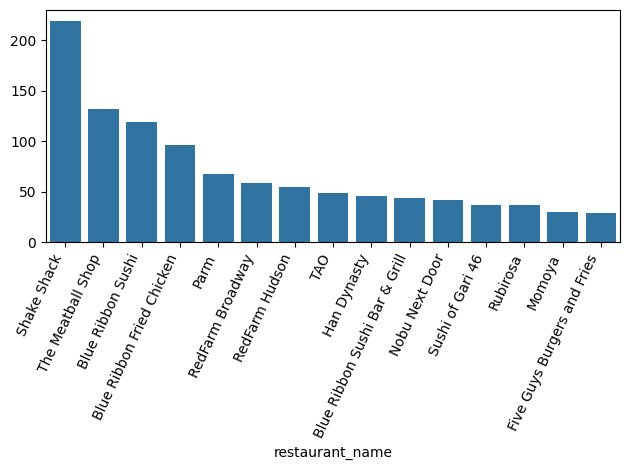

In [ ]:
# Creates a barplot showing the top 15 restaurants by number of orders, helping identify the most popular choices among customers
# Rotates x-axis labels for readability, adjusts layout to prevent overlap, and displays the plot
sns.barplot(x=df['restaurant_name'].value_counts().nlargest(15).index, y=df['restaurant_name'].value_counts().nlargest(15).values);
plt.xticks(rotation=65, ha='right',fontsize=10);
plt.tight_layout();
plt.show();


- *Shake Shack restaurant receives more orders than the other restaurants.*
- *The Meatball Shop restaurant receives more orders, followed by Shake Shack restaurant.*
- *Momoya restaurant and Five Guys Burgers and Fries restaurant receive fewer orders than the other restaurants..*

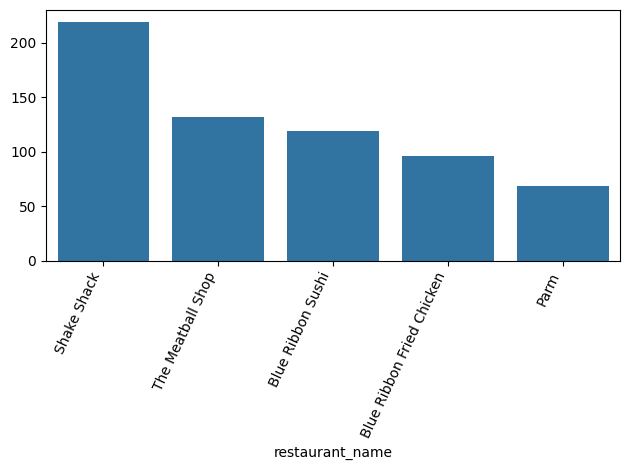

In [ ]:
# Creates a barplot showing the top 5 restaurants by number of orders, helping identify the most popular choices among customers
# Rotates x-axis labels for readability, adjusts layout to prevent overlap, and displays the plot
sns.barplot(x=df['restaurant_name'].value_counts().nlargest(5).index, y=df['restaurant_name'].value_counts().nlargest(5).values);
plt.xticks(rotation=65, ha='right',fontsize=10);
plt.tight_layout();
plt.show();

#### Observations: The top 5 restaurants in terms of the number of orders received are:
- *Shake Shack*
- *The Meatball Shop*
- *Blue Ribbon Sushi*
- *Blue Ribbon Fried Chicken*
- *Parm*



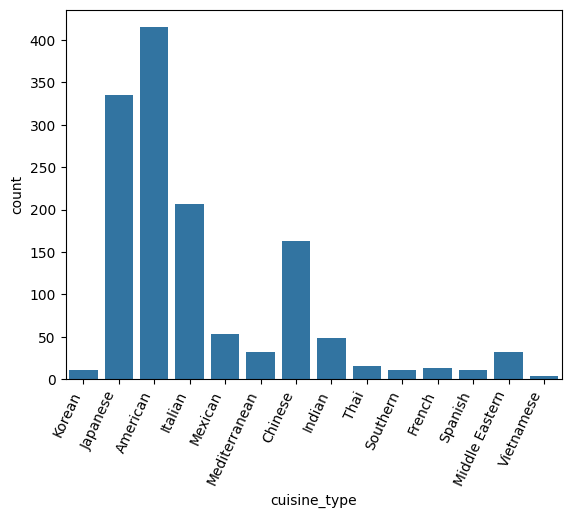

In [ ]:
# Filters the dataset for weekend orders and creates a countplot to visualize the frequency of each cuisine type ordered on weekends
# Rotates x-axis labels for better readability.
sns.countplot(data=df[df['day_of_the_week']=='Weekend'],x='cuisine_type');
plt.xticks(rotation=65, ha='right',fontsize=10);


#### Observations:
- *American cuisine is the most popular cuisine on weekends.*


In [ ]:
# Calculates the percentage of orders that cost more than $20
# Step 1: Get the total number of orders
total_orders = df.shape[0]

# Step 2: Count how many orders have a cost greater than $20
high_cost_orders = df[df['cost_of_the_order'] > 20].shape[0]

# Step 3: Compute the percentage of high-cost orders
percentage = (high_cost_orders / total_orders) * 100
# Step 4: Display the result with two decimal places
print(f"Percentage of orders costing more than $20: {percentage:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:
- *29.24% of the orders cost more than 20 dollars.*


In [ ]:
# Calculates the average delivery time across all orders and prints the result rounded to two decimal places
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean delivery time: {mean_delivery_time:.2f} minutes")


Mean delivery time: 24.16 minutes


#### Observations:
- *24.16 minutes  is the mean order delivery time.*


In [ ]:
# Identifies the top 3 customers based on the number of orders placed
# Step 1: Counts how many orders each customer placed and selects the top 3
top_customers = df['customer_id'].value_counts().nlargest(3);

# Step 2: Prints the IDs and order counts of the top 3 most frequent customers.
print("Top 3 most frequent customers:");
print(top_customers);


Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 most frequent customers are:
- *52832 - 13 orders*
- *47440 -10 orders*
- *83287 - 9 orders*


### Multivariate Analysis

Observation on `cost_of_the_order`, `food_preparation_time` and `delivery_time` distribution.

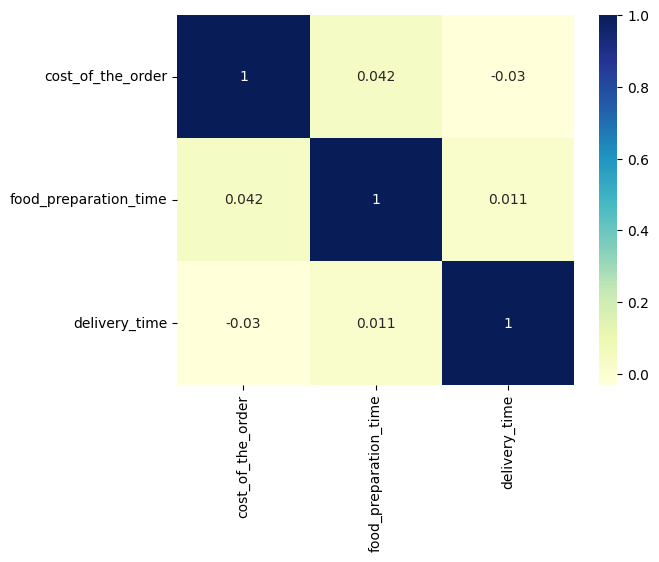

In [ ]:
# Defines a list of key numerical columns and plots a heatmap to visualize their pairwise correlation
# This helps identify potential relationships between order cost, preparation time, and delivery time
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True,cmap='YlGnBu');

- *The correlation value for `cost_of_the_order` and `food_preparation_time` is 0.042, which is a very weak positive correlation.*
- *The correlation value for `cost_of_the_order` and `delivery_time` is -0.03, which is a very weak negative correlation.*
- *From the graph it is revealed that there is no strong correlation with each of the variables.*
- *This shows that these variables are independent.*

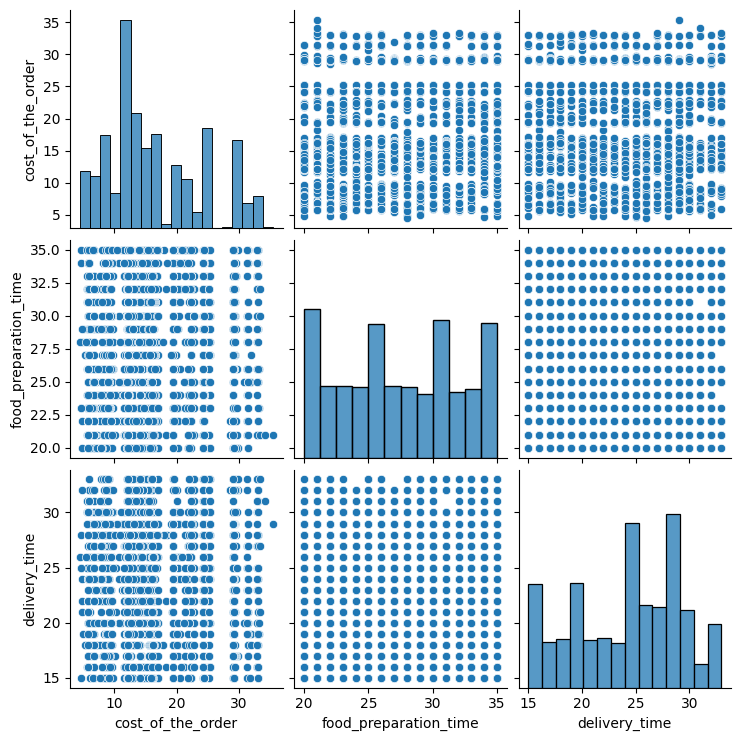

In [ ]:
# Generates pairwise scatter plots and distribution plots for the selected numerical columns to explore relationships and trends
sns.pairplot(df[num_cols]);

- *From the graph it is revealed that there is no linear relationship between the variables.*

Observation on `cuisine_type` and `cost of the order`distribution.

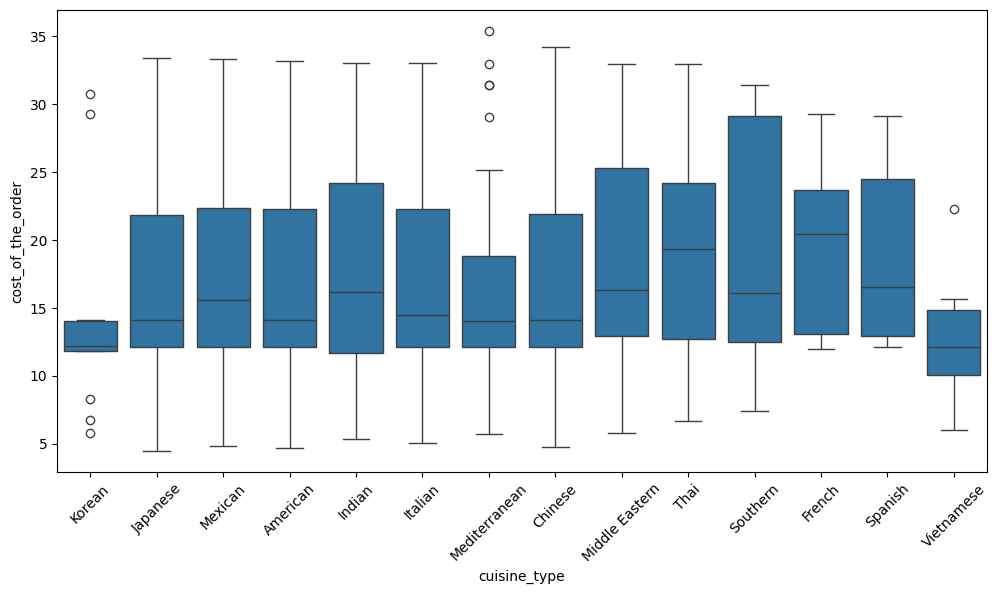

In [ ]:
# Creates a boxplot to compare the distribution of order costs across different cuisine types
# Sets the figure size for better visibility and rotates x-axis labels for readability
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.show()


- *The box shapes of American, Mexican, and Italian cuisines are identical, indicating that they have similar cost distribution.*
- *The box shapes of Korean and Vietnamese are low, indicating that they have low-cost distribution.*
- *Outliers are found in Korean, Mediterranean, and Vietnamese cuisines.*

In [ ]:
# Calculates the average order cost for each cuisine type and sorts the results in descending order to highlight the most expensive cuisines
df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)

,cost_of_the_order
cuisine_type,
French,19.793889
Southern,19.300588
Thai,19.207895
Spanish,18.994167
Middle Eastern,18.820612
Mexican,16.933117
Indian,16.919726
Italian,16.418691
American,16.319829


- *We see that French cuisine is expensive, followed by Southern and Thai cuisine.*
- *We also see that Vietnamese and Korean are budget-friendly with the low medians.*

Observation on `cuisine_type` and `food_preparation_time` distribution.

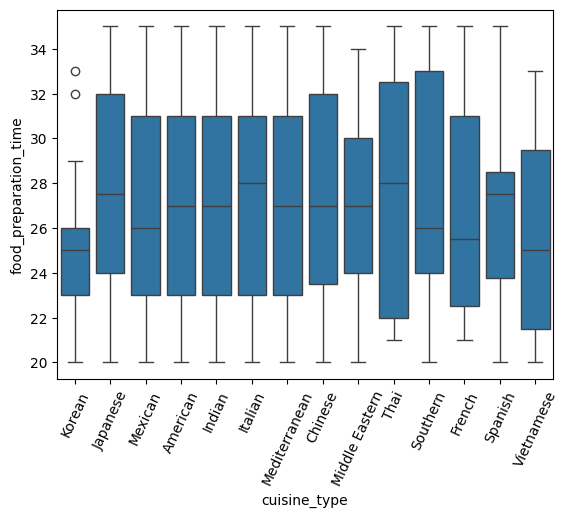

In [ ]:
# Creates a boxplot to compare food preparation times across different cuisine types, highlighting median, variability, and outliers
# Rotates x-axis labels for better readability
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time');
plt.xticks(rotation=65);

- *The box shape of Thai and Southern cuisine is high, indicating that these cuisines take a long time to prepare.*
- *Korean cuisine takes less time to prepare.*
- *Spanish cuisine takes less time to prepare, followed by Korean cuisine.*

Observation on `rating` and `day_of_the_week` distribution.

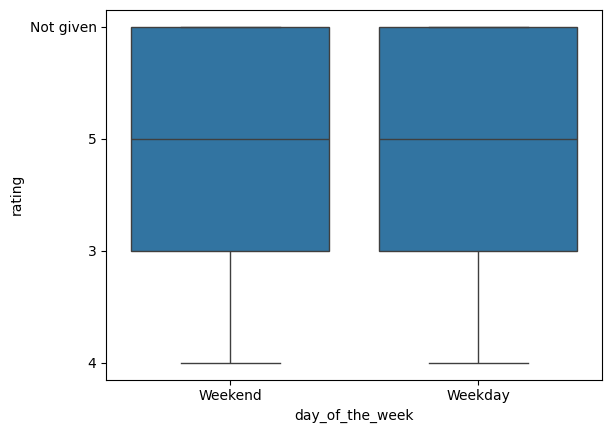

In [ ]:
# Creates a boxplot to compare customer ratings between weekdays and weekends, highlighting median satisfaction levels and variability
sns.boxplot(data=df, x='day_of_the_week', y='rating');

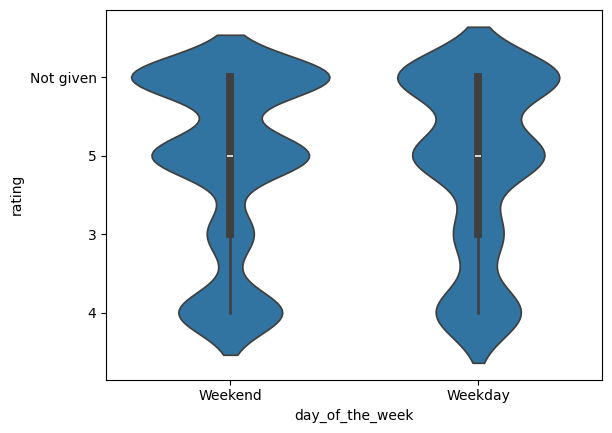

In [ ]:
# Creates a violin plot to visualize the distribution and density of customer ratings across weekdays and weekends
# Combines boxplot features with kernel density estimation to show both spread and concentration of ratings
sns.violinplot(data=df, x='day_of_the_week', y='rating');


- *We see that there are high ratings for both weekdays and weekends, showing the high customer satisfaction regardless of days.*
- *However, there is high data density on weekends,    indicating there are high orders on weekends.*
- *There are no outliers found on the graphs.*

Observation on `rating` and `delivery_time` distribution.

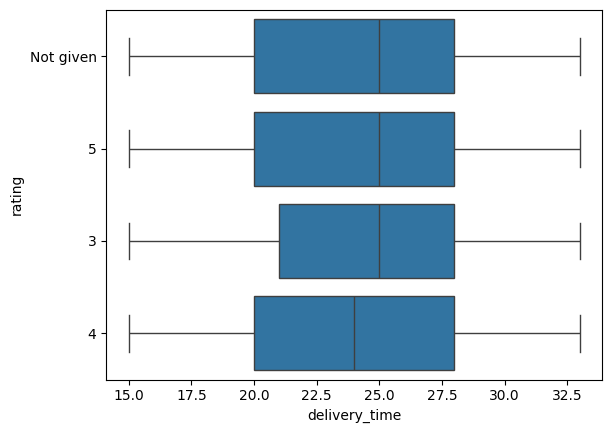

In [ ]:
# Creates a boxplot to examine how customer ratings vary across different delivery times, highlighting trends in satisfaction based on delivery speed
sns.boxplot(data=df, x='delivery_time', y='rating',);

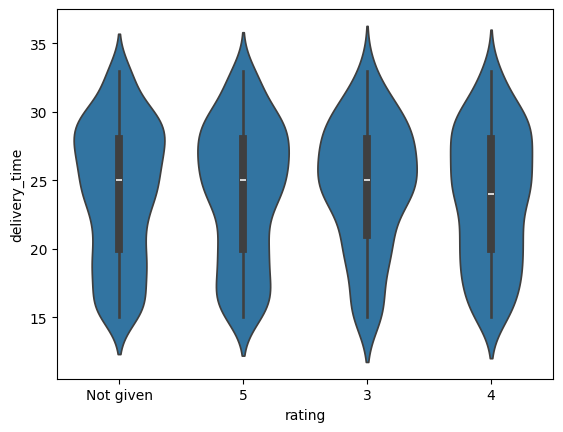

In [ ]:
# Creates a violin plot to visualize the distribution and density of delivery times across different customer ratings
# Helps identify how delivery speed correlates with customer satisfaction
sns.violinplot(data=df, x='rating', y='delivery_time');

- *From the two graphs, it is observed that `rating 5` has a shorter delivery time, ranging around 20-25 minutes.*
- *The `rating 3` has a long delivery period extending up to 35 minutes.*
- *Therefore, it is concluded that customers love fast delivery, which yields high ratings.*

Observation on `cuisine_type` and `day_of_the_week` distribution.

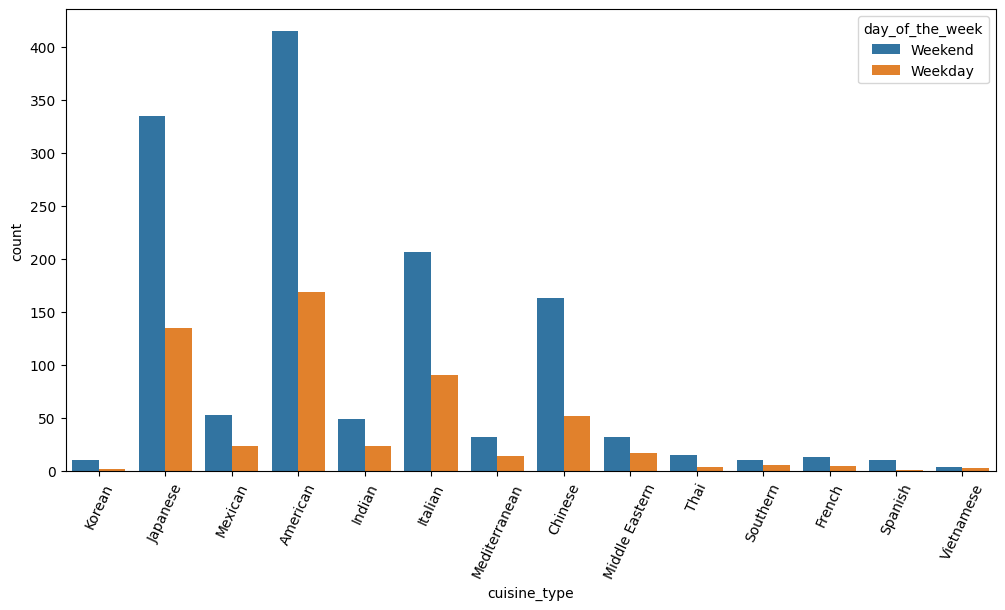

In [ ]:
# Creates a grouped countplot to compare the frequency of each cuisine type ordered on weekdays vs. weekends
# Sets figure size for better visibility and rotates x-axis labels for readability
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=65)
plt.show()


- *American cuisine was sold more, followed by Japanese and Italian cuisine.*
- *Vietnamese cuisine was the least sold cuisine.*
- *Spanish cuisine was sold less followed by Vietnamese cuisine.*



Observation on  `rating` and `cuisine_type` distribution.

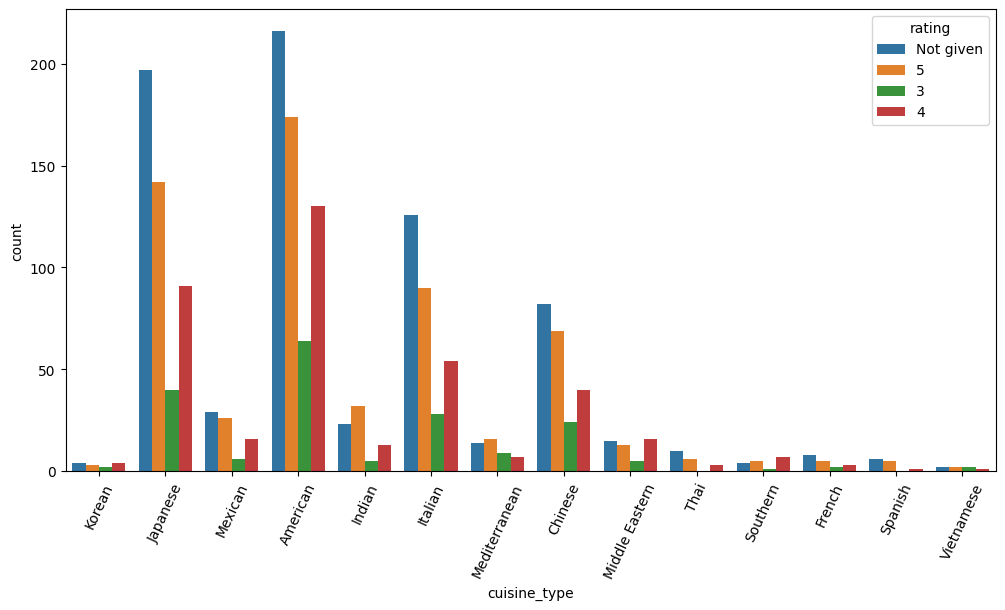

In [ ]:
# Creates a grouped countplot to compare the frequency of each cuisine type across different customer ratings
# Sets figure size for better visibility and rotates x-axis labels for readability
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cuisine_type', hue='rating')
plt.xticks(rotation=65)
plt.show()


- *American cuisine has high ratings, followed by Japanese and Italian cuisine.*
- *This shows that most of the customers love American cuisine.*
- Vietnamese cuisine has low ratings.

In [ ]:
# Write the code here
# Step 1: Remove unrated entries
df_clean = df[df['rating'] != 'Not given'].copy()
df_clean['rating'] = df_clean['rating'].astype(float)

# Step 2: Group by restaurant and calculate rating count and average rating
restaurant_stats = df_clean.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Step 3: Filter based on the promotional criteria
qualified_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Step 4: Display the result
print("Restaurants eligible for promotional offer:")
print(qualified_restaurants)


Restaurants eligible for promotional offer:
               restaurant_name  count      mean
16   Blue Ribbon Fried Chicken     64  4.328125
17           Blue Ribbon Sushi     73  4.219178
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905


#### Observations: Restaurants eligible for promotional offer are
- *Blue Ribbon Fried Chicken*
- *Blue Ribbon Sushi*     
- *Shake Shack*
- *The Meatball Shop*


In [ ]:
# Define a function to calculate commission per order
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue
net_revenue = df['commission'].sum()

# Display result
print(f"Net revenue generated by the company: ${net_revenue:.2f}")


Net revenue generated by the company: $6166.30


#### Observations:
- *The Net revenue generated by the company is $6166.30*


In [ ]:
# Step 1: Calculate total time per order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Step 2: Count orders taking more than 60 minutes
long_orders = df[df['total_time'] > 60].shape[0]

# Step 3: Calculate total number of orders
total_orders = df.shape[0]

# Step 4: Compute percentage
percentage = (long_orders / total_orders) * 100

# Step 5: Display result
print(f"Percentage of orders taking more than 60 minutes: {percentage:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
- *10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.*


In [ ]:
# Group by day_of_the_week and calculate mean delivery time
mean_delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean();

# Display the results
print("Mean Delivery Time:");
print(mean_delivery_by_day);

Mean Delivery Time:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
- *The weekday mean delivery time is 28.34 minutes.*
- *The Weekend mean delivery time is 22.47 minutes.*


### Conclusions:
*  American and Japanese cuisines are the top choices for customers, especially on weekends.
*  A majority of the orders are made on weekends rather than on weekdays.
* Customers give the highest ratings to orders that are delivered within a short time.
* Shake Shack restaurant receives more orders followed by The Meatball Shop and Blue Ribbon Sushi.
* Thai and Southern cuisines require a long preparation time.
* Around 29.24% of the orders have a price exceeding $20.

* French cuisine has the highest cost, followed by Southern and Thai cuisines.
* Around 10.54% of orders are delivered more than 60 minutes after being placed.
* Around 50% of deliveries happen within 20 to 28 minutes.
* The minimum time needed to prepare food is 20 minutes, whereas the maximum time required is 35 minutes.
* Half of the orders are priced between 12 and 22 dollars.







### Recommendations:

*  Additional delivery drivers need to be scheduled to meet the higher customer demand and increased food orders on weekends.
* Increase the number of kitchen staff on weekends to handle the high volume of orders.
* Stock more ingredients for American and Japanese cuisines since they are the top-selling cuisines on weekends.
* Pre-prepare some amount of American and Japanese cuisines in advance to speed up cooking during peak weekend demand.
* Optimize the pricing and commission strategy by highlighting premium, high-margin restaurants, encouraging upsells to drive orders over $20, and implementing flexible commission tiers based on cuisine type and delivery speed.
* Enhance customer loyalty by offering a loyalty program to reward repeated customers, with discounts tailored to their preferred cuisines and ordering habits, thereby strengthening customer relationships.

* Offer free delivery on orders over $20 to motivate customers to spend more and place online orders more frequently, especially those who are sensitive to price.
* Provide a different free cuisine sample each week to showcase new flavors and boost the likelihood of future orders.
* Provide a 15% discount on the least-ordered cuisines, like Spanish and Vietnamese, to encourage customer trials and balance sales distribution.
* Offer special meal combos at a slightly discounted price, available exclusively on weekends.
* Offer exclusive discounts or combo deals through the app to drive traffic, encourage online orders, and reduce reliance on in-store promotions and staff resources.

---